In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tensorflow-speech-recognition-challenge/link_to_gcp_credits_form.txt
/kaggle/input/tensorflow-speech-recognition-challenge/test.7z
/kaggle/input/tensorflow-speech-recognition-challenge/sample_submission.7z
/kaggle/input/tensorflow-speech-recognition-challenge/train.7z


In [2]:
!pip install pyunpack
!pip install patool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 3.0 MB/s eta 0:00:00


In [3]:
import os
from pyunpack import Archive
import shutil
if not os.path.exists('/kaggle/working/train/'):
    os.makedirs('/kaggle/working/train/')
Archive('/kaggle/input/tensorflow-speech-recognition-challenge/train.7z').extractall('/kaggle/working/train/')


In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import matplotlib.style as ms

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


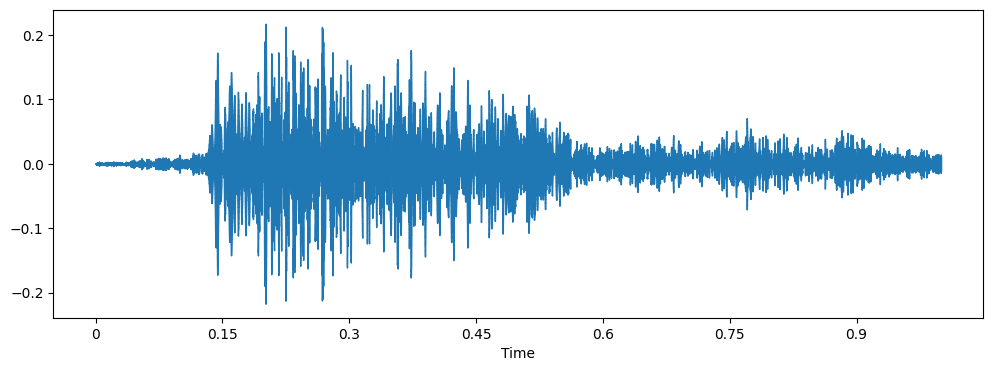

In [5]:
data, sampling_rate = librosa.load('/kaggle/working/train/train/audio/down/3bfd30e6_nohash_3.wav')
plt.figure(figsize=(12,4))
librosa.display.waveshow(data,sr=sampling_rate)

In [6]:
data, sampling_rate = librosa.load('/kaggle/working/train/train/audio/down/3bfd30e6_nohash_3.wav')
print('Data : ', data)
print('number of Data : ', len(data))
print('sampling_rate : ', sampling_rate)

Data :  [ 0.00035192  0.00023077  0.0001062  ... -0.0070652  -0.00622757
 -0.00346543]
number of Data :  22050
sampling_rate :  22050


In [7]:
data, sampling_rate = librosa.load('/kaggle/working/train/train/audio/zero/327289eb_nohash_0.wav',sr=None)
print('Data : ', data)
print('number of Data : ', len(data))
print('sampling_rate : ', sampling_rate)

Data :  [-0.00024414  0.00042725  0.00094604 ... -0.0005188  -0.00033569
 -0.00106812]
number of Data :  14861
sampling_rate :  16000


In [8]:
data, sampling_rate = librosa.load('/kaggle/working/train/train/audio/zero/b93528e3_nohash_0.wav',sr=8000)
print('Data : ', data)
print('number of Data : ', len(data))
print('sampling_rate : ', sampling_rate)

Data :  [-4.5823297e-04 -6.2076072e-04 -1.9502838e-04 ... -5.1036617e-04
 -4.4072035e-04 -6.5347107e-05]
number of Data :  8000
sampling_rate :  8000


In [9]:
ms.use('seaborn-muted')

/tmp/ipykernel_20/1416757634.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  ms.use('seaborn-muted')


In [10]:
words=os.listdir('/kaggle/working/train/train/audio')
words

['four',
 'bird',
 'down',
 'happy',
 'marvin',
 'dog',
 'zero',
 'go',
 'cat',
 'house',
 'one',
 'two',
 'five',
 '_background_noise_',
 'bed',
 'off',
 'wow',
 'left',
 'nine',
 'six',
 'stop',
 'up',
 'on',
 'sheila',
 'no',
 'right',
 'yes',
 'tree',
 'eight',
 'seven',
 'three']

import matplotlib.pyplot as plt
import numpy as np
train_audio_path='/kaggle/working/train/train/audio'
labels=os.listdir(train_audio_path)

#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

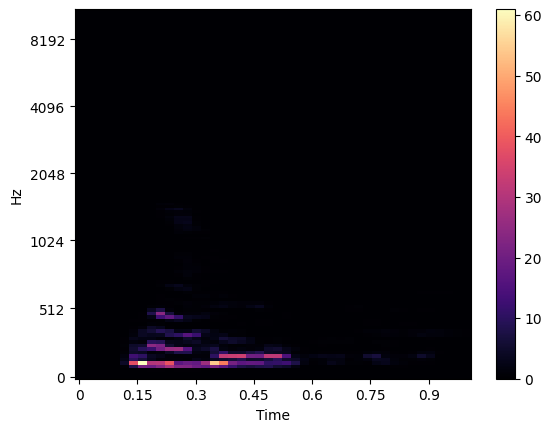

In [11]:
data, sampling_rate = librosa.load('/kaggle/working/train/train/audio/down/3bfd30e6_nohash_3.wav')
melspec=librosa.feature.melspectrogram(y=data,sr=sampling_rate)
plt.figure()
librosa.display.specshow(melspec,y_axis='mel',x_axis='time')
plt.colorbar()

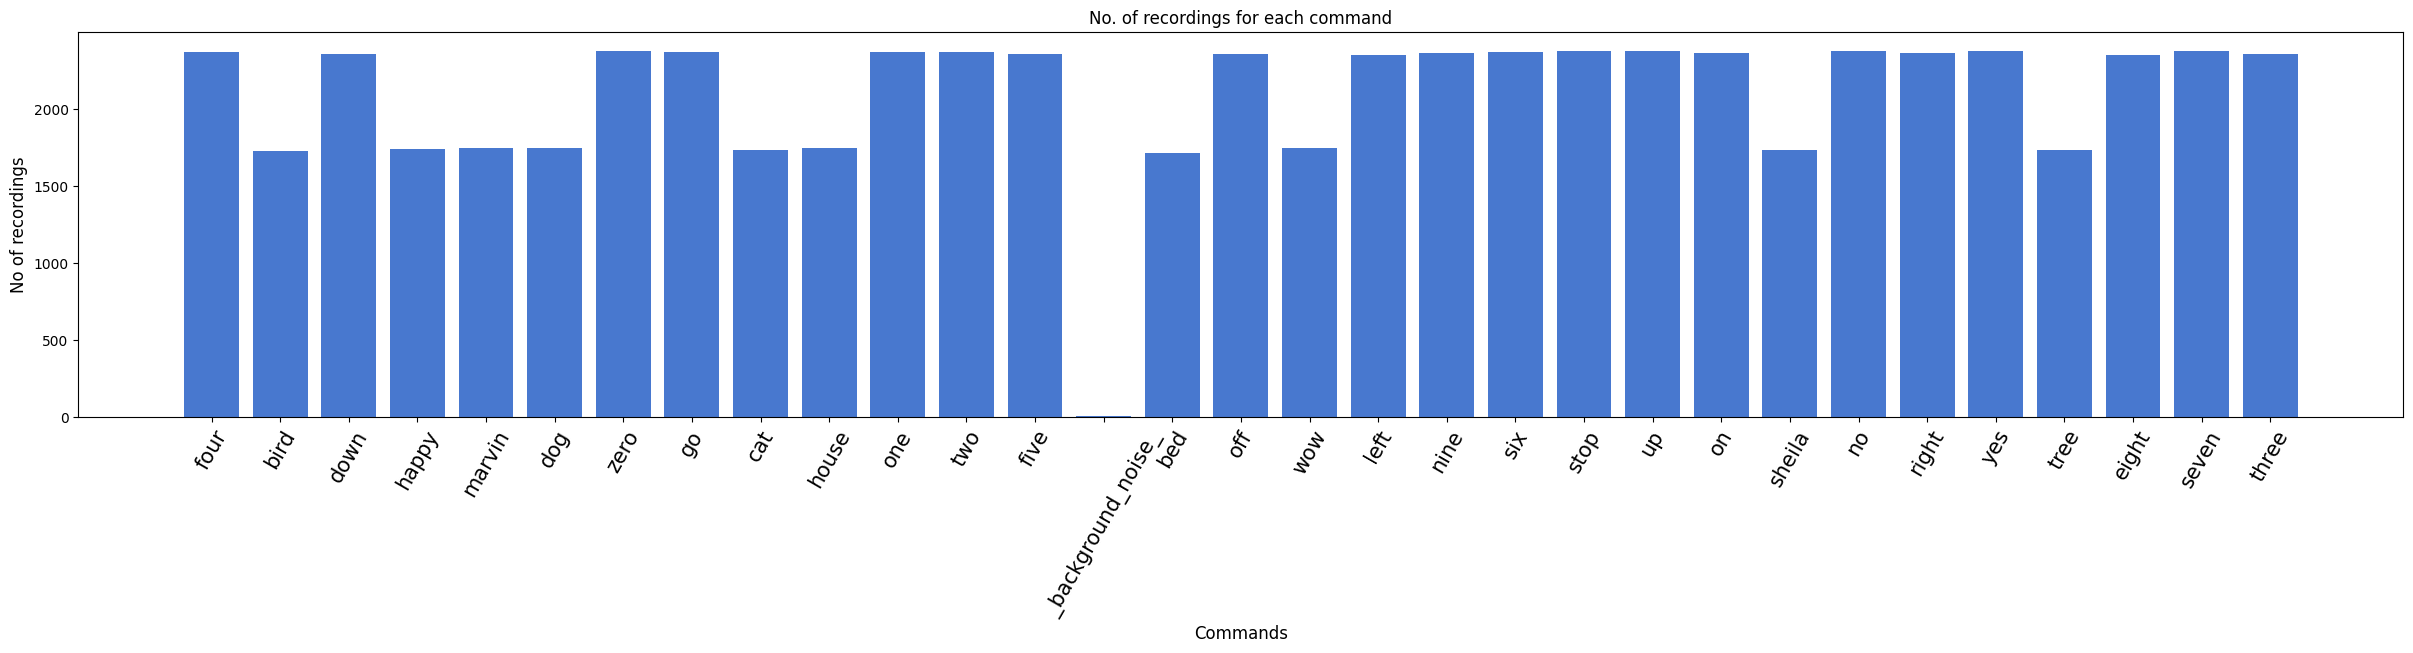

In [12]:
train_audio_path='/kaggle/working/train/train/audio'
labels=os.listdir(train_audio_path)

#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

In [13]:
all_wave = []
all_label = []

for label in labels[:6]:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 8000)
        #samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

four
bird
down
happy
marvin
dog


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

In [15]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))

In [16]:
all_wave

[array([-0.00023346,  0.00020038,  0.00070022, ..., -0.00056472,
         0.00023265,  0.00095766], dtype=float32),
 array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -5.4326840e-05,  4.4109024e-06,  2.9971020e-06], dtype=float32),
 array([ 0.00218455,  0.00636923,  0.00721842, ..., -0.00523362,
        -0.00526909, -0.00513098], dtype=float32),
 array([-1.5323449e-04,  1.1278131e-04,  7.8612356e-05, ...,
         1.1041665e-03,  9.8841067e-04,  9.8599447e-04], dtype=float32),
 array([-1.4448942e-06,  2.9819174e-05, -8.5105003e-06, ...,
        -4.8398739e-03, -4.7316132e-03, -1.5464583e-03], dtype=float32),
 array([-0.0001228 , -0.00016881, -0.00013436, ...,  0.0002756 ,
         0.00019572,  0.00040474], dtype=float32),
 array([-1.14077346e-04,  4.85828641e-05,  1.67783583e-08, ...,
        -8.05625459e-05, -6.63795799e-05, -1.36557312e-04], dtype=float32),
 array([ 0.00055745, -0.00068084, -0.00073411, ...,  0.0005858 ,
         0.00081725,  0.00107801], dtype=floa

In [17]:
all_wave = np.array(all_wave).reshape(-1,8000)

In [18]:
all_wave.shape

(10505, 8000)

In [19]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)
x_te, x_val, y_te, y_val = train_test_split(x_val,y_val,stratify=y_val,test_size = 0.5,random_state=777,shuffle=True)

In [20]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8000, 1)]         0         
                                                                 
 conv1d (Conv1D)             (None, 7988, 8)           112       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2662, 8)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 2662, 8)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 2652, 16)          1424      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 884, 16)          0         
 1D)                                                         

In [21]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 

In [22]:
history=model.fit(x_tr, y_tr ,epochs=20,callbacks=es,  batch_size=32, validation_data=(x_val,y_val))

Epoch 1/20
263/263 [==============================] - 28s 102ms/step - loss: 1.9180 - accuracy: 0.1923 - val_loss: 1.7264 - val_accuracy: 0.2245
Epoch 2/20
263/263 [==============================] - 26s 101ms/step - loss: 1.5319 - accuracy: 0.3550 - val_loss: 1.2844 - val_accuracy: 0.5167
Epoch 3/20
263/263 [==============================] - 26s 97ms/step - loss: 1.1042 - accuracy: 0.5803 - val_loss: 0.9015 - val_accuracy: 0.6974
Epoch 4/20
263/263 [==============================] - 26s 99ms/step - loss: 0.8727 - accuracy: 0.6799 - val_loss: 0.6818 - val_accuracy: 0.7678
Epoch 5/20
263/263 [==============================] - 26s 98ms/step - loss: 0.7447 - accuracy: 0.7391 - val_loss: 0.6651 - val_accuracy: 0.7831
Epoch 6/20
263/263 [==============================] - 26s 100ms/step - loss: 0.6242 - accuracy: 0.7824 - val_loss: 0.4880 - val_accuracy: 0.8440
Epoch 7/20
263/263 [==============================] - 26s 98ms/step - loss: 0.5154 - accuracy: 0.8203 - val_loss: 0.4426 - val_accura

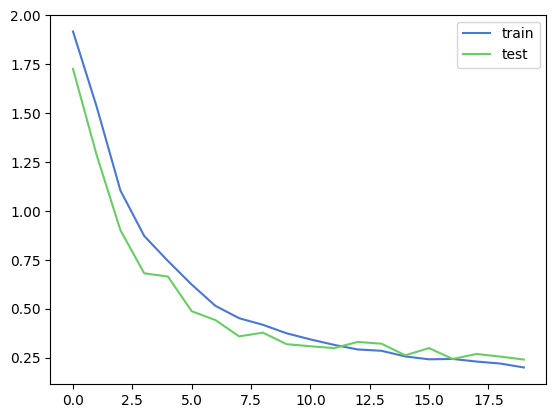

In [23]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend()
pyplot.show()

In [24]:
from keras.models import load_model
model.save('best_model.hdf5')

In [25]:
def predict(audio):
    prob=model.predict(audio.reshape(1,8000))
    index=np.argmax(prob[0])
    return classes[index]

In [26]:
import random
index=random.randint(0,len(x_val)-1)
samples=x_val[index]
print("Audio:",classes[np.argmax(y_val[index])])
#ipd.Audio(samples, rate=8000)
print("Text:",predict(samples))

Audio: bird
1/1 [==============================] - 0s 140ms/step
Text: bird


In [27]:
predictions = model.predict(x=x_te, verbose=0)

In [28]:
print(y_te.shape,predictions.shape)

(1050, 31) (1050, 31)


In [29]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix = confusion_matrix(y_te.argmax(axis=1),predictions.argmax(axis=1))
confusion_matrix
print(classification_report(y_te.argmax(axis=1), predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       152
           1       0.84      0.88      0.86       154
           2       0.91      0.92      0.91       215
           3       0.95      0.92      0.93       216
           4       0.94      0.97      0.96       155
           5       0.95      0.89      0.92       158

    accuracy                           0.92      1050
   macro avg       0.92      0.92      0.92      1050
weighted avg       0.92      0.92      0.92      1050



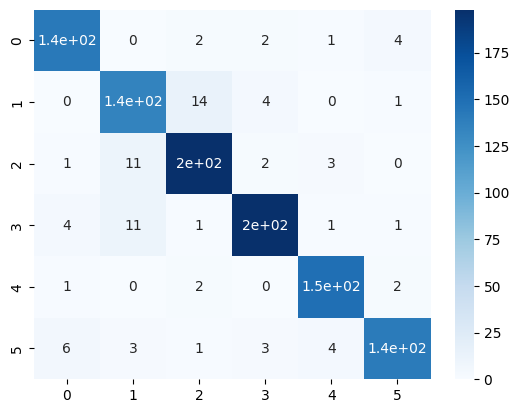

In [30]:
import seaborn as sn

sn.heatmap(confusion_matrix, annot=True, cmap=plt.cm.Blues)
plt.show()